## Linear Classifer on PoS tagged data - Pseudo data test

Use the pseudo data `data.csv` generated to run a linear classifier on the embeddings and draw the boundary to check it and possibly compute a directional derivative as well.

In [114]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import ast
from sklearn.model_selection import train_test_split

In [97]:
data = open('data.txt', 'r')
lines = data.readlines()

In [99]:
features, labels = [], []
for line in lines:
    name, embed, label = line.split(';')
    embed = ast.literal_eval(embed)
    features.append(embed)
    labels.append(int(label))

ValueError: not enough values to unpack (expected 3, got 2)

In [100]:
print(len(features), len(labels))

44 44


In [101]:
print(labels)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [102]:
print(labels[0], features[0][:5])
print(labels[1], features[1][:5])

0 [-0.37874600291252136, -0.0703376978635788, -0.36608144640922546, -0.10915069282054901, -0.24549156427383423]
0 [-0.06094054505228996, -0.39486756920814514, -0.5337704420089722, 0.17299635708332062, 0.2710832357406616]


In [113]:
fts = np.array(features)
lbls = np.array(labels)
print(fts.shape, lbls.shape)

(44, 768) (44,)


In [104]:
lbl = to_categorical(lbls, 2)
print(lbl.shape)

(44, 2)


In [105]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [106]:
clf.fit(fts, lbls)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
yhat = clf.predict(fts)

In [110]:
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(lbls, yhat)

1.0

In [115]:
X_train, X_test, y_train, y_test = train_test_split(fts, lbls, test_size=0.33, random_state=42)

In [116]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
y_test_pred = clf.predict(X_test)

In [119]:
accuracy_score(y_test, y_test_pred)

0.9333333333333333

In [122]:
X = fts
y = lbls

In [130]:
print(X_train[:10].shape)
print(y_train[:10].shape)

(10, 768)
(10,)


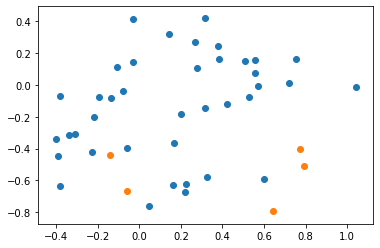

In [141]:
for class_value in range(2):
    row_ix = np.where(lbls == class_value)
    plt.scatter(fts[row_ix, 0], fts[row_ix, 1])
plt.show()

In [149]:
cavs = [-1 * clf.coef_[0], clf.coef_[0]]

In [165]:
# check this in directional derivative
# cavs[0] -> no noun
# cavs[1] -> noun - bank

if len(clf.coef_) == 1:
    # if there were only two labels, the concept is assigned to label 0 by
    # default. So we flip the coef_ to reflect this.
    cavs = [-1 * clf.coef_[0], clf.coef_[0]]
else:
    cavs = [c for c in lm.coef_]

In [170]:
for ix in cavs:
    print(ix)
    print('='*70)

[-2.16106035e-02  2.03222574e-02 -2.23952191e-02  1.36623318e-02
 -3.41200915e-02 -4.56970769e-02  1.48990035e-02  1.15190635e-02
 -1.17806912e-02  1.32394765e-02  3.32520789e-02 -4.26966158e-03
  1.93503776e-02  5.53191543e-02 -3.54755849e-02  1.24747662e-02
  4.06659293e-03 -5.10078960e-02 -2.67716860e-02 -6.77888864e-03
  3.17684080e-02 -2.43507717e-02 -2.07131683e-03  5.33490343e-03
  2.69318808e-02  8.47773075e-03 -6.14528010e-02  2.52278335e-02
  2.79877552e-03 -2.40325014e-02 -7.11106891e-03 -2.81666955e-02
 -3.81545703e-03 -5.94492233e-03 -8.50036348e-03 -5.73307204e-02
  4.58032360e-02 -3.41017066e-02 -2.31996433e-02  5.32673921e-03
 -4.04647501e-02  2.83807965e-02 -3.18274894e-03  4.68956464e-03
  1.51348096e-02 -1.88495529e-02 -1.81321602e-03 -5.73092701e-02
  5.90530965e-02 -6.15840118e-03 -5.32943475e-03 -4.61680964e-02
 -3.10485582e-02  1.32821252e-02  2.68735452e-02  2.72809093e-02
 -3.13821354e-02 -2.23303149e-02 -1.64805069e-02  7.84150092e-03
  2.53720380e-02 -6.52453

In [173]:
# compute the directional derivative - \partial{class_acts}/{concept_cav}

concepts = ['noun']
def get_direction(concept):
    return cavs[concepts.index(concept)]

In [174]:
direc = get_direction('noun')

In [191]:
print(X_train[0][:4], y_train[0])
print(X_train[8][:4], y_train[8])

[-0.10725261  0.11119931  0.07953276  0.11941066] 0
[ 0.79170519 -0.51132411 -0.03086021 -0.06428905] 1


In [206]:
def compute_direc_derivative(x,y):
    a = np.dot(x, y)
    return a < 0

In [207]:
pos_dydx = compute_direc_derivative(X_train[8], direc)
neg_dydx = compute_direc_derivative(X_train[0], direc)

In [208]:
pos_dydx

True

In [209]:
neg_dydx

False

In [215]:
scores = []
count = 0

for i, ix in enumerate(X_train):
    lab = y_train[i]
    dydx = compute_direc_derivative(ix, direc)
    if dydx:
        count += 1
        
tcav = float(count) / float(len(X_test))
neg = 1 - tcav

In [221]:
print('TCAV: ', tcav)
print('Not: ', neg)
tcavs = {'noun': tcav, 'other': neg}

TCAV:  0.26666666666666666
Not:  0.7333333333333334


In [226]:
tcavs

{'noun': 0.26666666666666666, 'other': 0.7333333333333334}

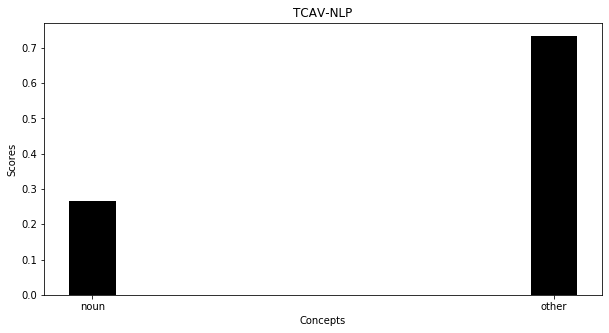

In [228]:
fig = plt.figure(figsize = (10, 5)) 
  
plt.bar(list(tcavs.keys()), list(tcavs.values()), color ='black', width = 0.1)

plt.xlabel("Concepts")
plt.ylabel("Scores")
plt.title("TCAV-NLP")
plt.show()